In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

## Original Cold Year (2008)

In [3]:

#years, months, data
monthly_array_meso_orig_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2008, 2009), ['mesozooplankton']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

### Original 2008     

for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_meso_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

 

In [4]:
monthly_array_meso_orig_slice[monthly_array_meso_orig_slice == 0 ] = np.nan
monthly_array_meso_orig_slicemean = \
np.nanmean(np.nanmean(monthly_array_meso_orig_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_meso_orig_slicemean))

(14, 12)


/tmp/ipykernel_2343633/3786013959.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_meso_orig_slice, axis = 2),axis = 2)


## Full Year Switch (2019 winds applied to 2008)

In [5]:

#years, months, data
monthly_array_meso_full_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2008, 2009), ['mesozooplankton']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_W19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_meso_full_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_W19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_meso_full_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)



        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]




In [6]:
monthly_array_meso_full_slice[monthly_array_meso_full_slice == 0 ] = np.nan
monthly_array_meso_full_slicemean = \
np.nanmean(np.nanmean(monthly_array_meso_full_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_meso_full_slicemean))

(14, 12)


/tmp/ipykernel_2343633/4071897152.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_meso_full_slice, axis = 2),axis = 2)


## Spring wind switch (2008 with 2019 spring winds)

In [7]:

#years, months, data
monthly_array_meso_spring_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2008, 209), ['mesozooplankton']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

        
# Add experiment year; Keep winds the same for January and February
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 3):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
      
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_meso_spring_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Change winds for spring (March to May)
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(3, 6):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01mar08_wind19_spring/SalishSea_1m_{datestr}_{datestr}'
      
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_meso_spring_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)                

# Winds for rest of the year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(6, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jun08_wind19_spring/SalishSea_1m_{datestr}_{datestr}'
      
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_meso_spring_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)       

        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [8]:
monthly_array_meso_spring_slice[monthly_array_meso_spring_slice == 0 ] = np.nan
monthly_array_meso_spring_slicemean = \
np.nanmean(np.nanmean(monthly_array_meso_spring_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_meso_spring_slicemean))

(14, 12)


/tmp/ipykernel_2343633/3258791419.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_meso_spring_slice, axis = 2),axis = 2)


## Summer Wind Switch (2008 with 2019 summer winds)

In [9]:
#years, months, data
monthly_array_meso_summer_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2008, 2009), ['mesozooplankton']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}



        
# Add experiment year; Keep winds the same for January and May
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 6):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_meso_summer_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Change winds for Summer (June to August)
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(6, 9):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jun08_wind19_summer/SalishSea_1m_{datestr}_{datestr}'
      
      
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_meso_summer_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)                

# Winds for rest of the year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(9, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01sep08_wind19_summer/SalishSea_1m_{datestr}_{datestr}'
      
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_meso_summer_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)       

        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]

In [10]:
monthly_array_meso_summer_slice[monthly_array_meso_summer_slice == 0 ] = np.nan
monthly_array_meso_summer_slicemean = \
np.nanmean(np.nanmean(monthly_array_meso_summer_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_meso_summer_slicemean))

(14, 12)


/tmp/ipykernel_2343633/3897704284.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_meso_summer_slice, axis = 2),axis = 2)


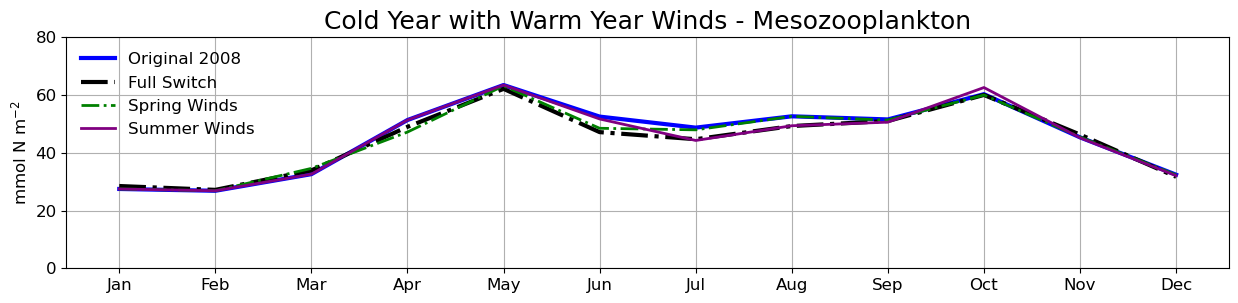

In [19]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_meso_orig_slicemean[1,:],color='b',linestyle='-',linewidth=3,label='Original 2008')
ax.plot(xticks, monthly_array_meso_full_slicemean[1,:],color='k',linestyle='-.',linewidth=3,label='Full Switch')
ax.plot(xticks, monthly_array_meso_spring_slicemean[1,:],color='green',linestyle='-.',linewidth=2,label='Spring Winds')
ax.plot(xticks, monthly_array_meso_summer_slicemean[1,:],color='purple',linestyle='-',linewidth=2,label='Summer Winds')


ax.set_title('Cold Year with Warm Year Winds - Mesozooplankton',fontsize=18)
ax.legend(frameon=False,loc=2)
ax.set_ylim(0,80)
ax.set_ylabel('mmol N m$^{-2}$')

ax.grid()

In [12]:
MesozoopClim=[27.47426297, 26.31307524, 31.86424676, 51.44406645, 61.40357479,
       51.78093568, 48.49562781, 50.47304647, 55.91385628, 60.30809624,
       45.53838728, 32.19598194]

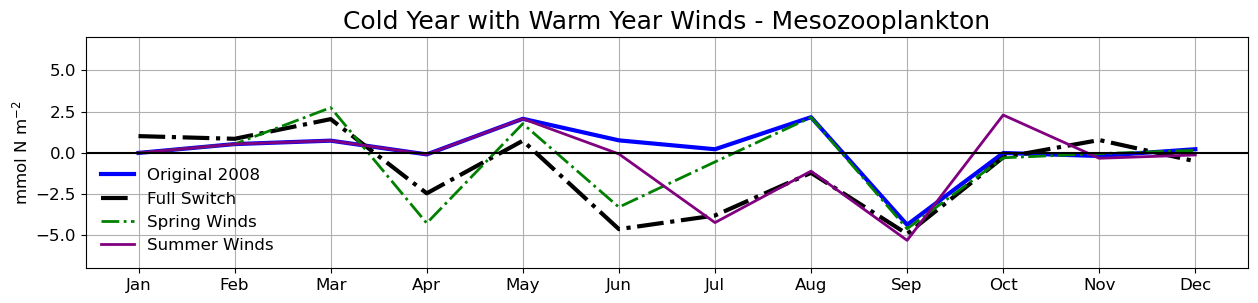

In [22]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_meso_orig_slicemean[1,:]-MesozoopClim,color='b',linestyle='-',linewidth=3,label='Original 2008')
ax.plot(xticks, monthly_array_meso_full_slicemean[1,:]-MesozoopClim,color='k',linestyle='-.',linewidth=3,label='Full Switch')
ax.plot(xticks, monthly_array_meso_spring_slicemean[1,:]-MesozoopClim,color='green',linestyle='-.',linewidth=2,label='Spring Winds')
ax.plot(xticks, monthly_array_meso_summer_slicemean[1,:]-MesozoopClim,color='purple',linestyle='-',linewidth=2,label='Summer Winds')


ax.set_title('Cold Year with Warm Year Winds - Mesozooplankton Anomalies',fontsize=18)
ax.legend(frameon=False,loc=3)
ax.axhline(y=0,color='k',linestyle='-')
ax.set_ylim(-7,7)
ax.set_ylabel('mmol N m$^{-2}$')

ax.grid()